In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
# %matplotlib inline

iris_dataset = load_iris()

In [2]:
print('Keys of iris_dataset:\n{}'.format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_dataset['DESCR'][:193]+'\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [4]:
print('Feature names: \n{}'.format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print('Type of data: {}'.format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [6]:
print('Shape of data: {}'.format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [7]:
print('First five rows of data:\n {}'.format(iris_dataset['data'][:5]))

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
print('Type of target: {}'.format(iris_dataset['target']))

Type of target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print('Shape of target: {}'.format(iris_dataset['target'].shape))

Shape of target: (150,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [11]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [12]:
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


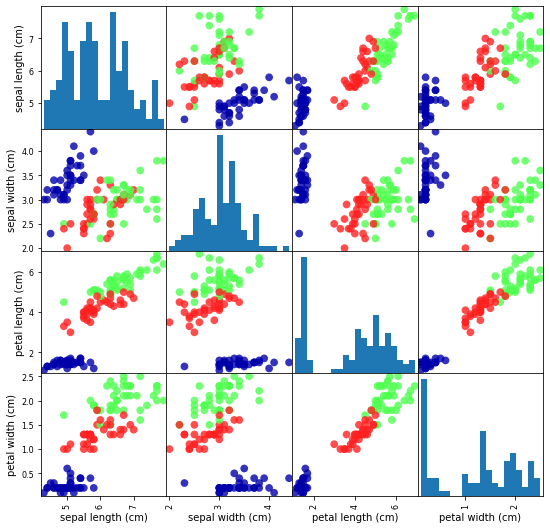

In [13]:
# 利用X_trains里的数据创建DataFrame
# 利用iris_dataset.feature_names中的字符串对数据列进行标记
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
# 利用DataFrame创建散点图矩阵，按y_trains着色
grr=pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(9,9),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
# 这就开始训练了
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
# 试一下训练成果如何
X_new=np.array([[5,2.9,1,0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [17]:
prediction=knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [18]:
y_pred=knn.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [19]:
# 计算准确率
print('Test set score: {:.2f}'.format(np.mean(y_pred==y_test)))

Test set score: 0.97
